### **CodeX Computing & Co. - Python Internship Program - Assignment 6**

#### Issue Date: 10th May, 2025 
#### Due Date: 15th May, 2025 (Thursday at 11:59) 

# **Author:** Abu Bakar
# **Intern ID:** CCPY-0011

<div style="text-align: center">

# **"Python Assignment 06"**

</div>

In [4]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset = "Neflix Movies and TV Shows"

In [7]:
netflix_dataset = pd.read_csv('Datasets/Neflix_Movies_and_TVShows.csv')

In [8]:
netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Numpy Tasks

1.  Create a NumPy array of release years. Find earliest and latest year and most frequent release year

In [10]:
# Create NumPy array of release years
release_years = np.array(netflix_dataset['release_year'])

# Find earliest year
earliest_year = np.min(release_years)
print(f"Earliest release year: {earliest_year}")

# Find latest year
latest_year = np.max(release_years)
print(f"Latest release year: {latest_year}")

# Find most frequent year
most_frequent_year = np.bincount(release_years).argmax()
print(f"Most frequent release year: {most_frequent_year}")

Earliest release year: 1925
Latest release year: 2021
Most frequent release year: 2018


2.  Filter and count Movies longer than 90 minutes using NumPy.

In [14]:
# Filter only movies
movies_mask = netflix_dataset['type'] == 'Movie'
movie_durations = netflix_dataset.loc[movies_mask, 'duration'].str.extract(r'(\d+)').astype(float)

# Count movies longer than 90 minutes
long_movies_count = (movie_durations[0] > 90).sum()
print(f"Number of movies longer than 90 minutes: {long_movies_count}")

Number of movies longer than 90 minutes: 4138


3.  Calculate total number of TV Shows added between 2015–2020 using array filtering. 

In [16]:
# Convert date_added to datetime and extract year, handling inconsistent date formats
date_added_years = pd.to_datetime(netflix_dataset['date_added'], format='mixed').dt.year

# Create mask for TV Shows
tv_shows_mask = netflix_dataset['type'] == 'TV Show'

# Create mask for years between 2015-2020
years_mask = (date_added_years >= 2015) & (date_added_years <= 2020)

# Combine masks and count
tv_shows_2015_2020 = np.sum(tv_shows_mask & years_mask)
print(f"Number of TV Shows added between 2015-2020: {tv_shows_2015_2020}")


Number of TV Shows added between 2015-2020: 2150


## Matplotlib Tasks

4.  Make a Pie chart on Movies vs TV Shows ratio.

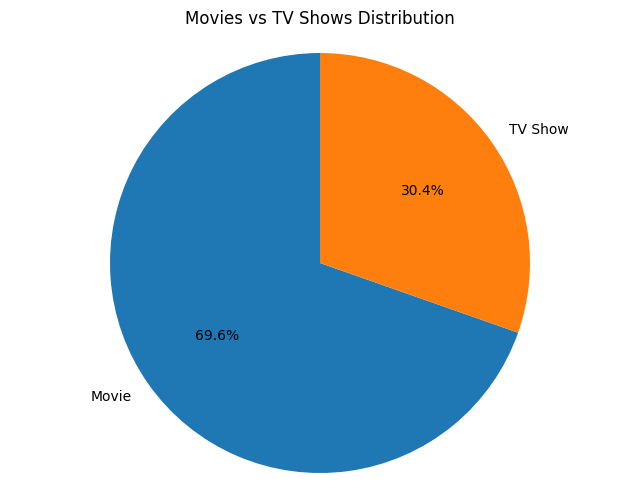

In [17]:
# 4. Pie chart for Movies vs TV Shows ratio
plt.figure(figsize=(8, 6))
type_counts = netflix_dataset['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Movies vs TV Shows Distribution')
plt.axis('equal')
plt.show()

5.  Make a Bar chart on Top 10 countries with most content.

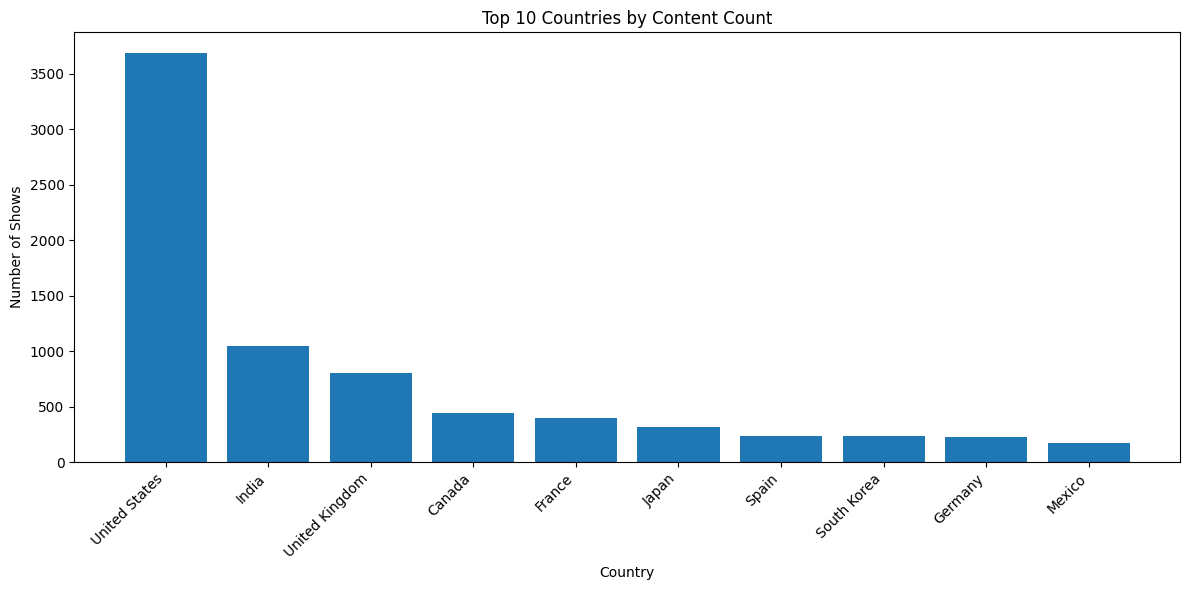

In [18]:
# 5. Bar chart for Top 10 countries with most content
plt.figure(figsize=(12, 6))
# Split countries and count occurrences
country_counts = netflix_dataset['country'].str.split(', ').explode().value_counts().head(10)
plt.bar(country_counts.index, country_counts.values)
plt.title('Top 10 Countries by Content Count')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.show()

6.  Draw a Line graph having Total shows added per year.

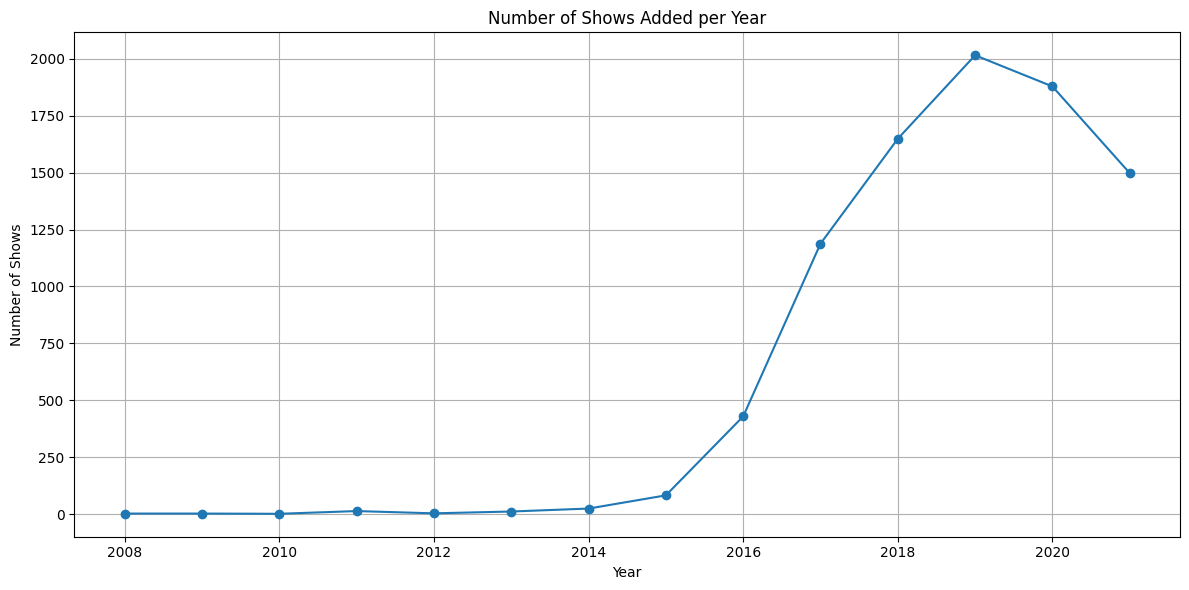

In [19]:
# 6. Line graph for shows added per year
plt.figure(figsize=(12, 6))
# Convert date_added to datetime and extract year
shows_per_year = pd.to_datetime(netflix_dataset['date_added'], format='mixed').dt.year.value_counts().sort_index()
plt.plot(shows_per_year.index, shows_per_year.values, marker='o')
plt.title('Number of Shows Added per Year')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.grid(True)
plt.tight_layout()
plt.show()


### Dataset = "Suicide Rates Overview 1985 to 2016 – Kaggle" 


In [21]:
suicide_dataset = pd.read_csv('Datasets/suicide_rates_overview_1985_to_2016.csv')
suicide_dataset.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


## Numpy Tasks 


7.  Create a NumPy array of suicide rates and calculate Global mean, max, and standard deviation.

In [22]:
# Create a NumPy array of suicide rates, handling NaN values
suicide_rates = np.array(suicide_dataset['suicides_no'].fillna(0))

# Calculate global statistics
global_mean = np.mean(suicide_rates)
global_max = np.max(suicide_rates)
global_std = np.std(suicide_rates)

# Print the results
print(f"Global mean of suicides: {global_mean:.2f}")
print(f"Global maximum suicides: {global_max}")
print(f"Global standard deviation: {global_std:.2f}")


Global mean of suicides: 183.35
Global maximum suicides: 22338.0
Global standard deviation: 780.85


8.  Filter data using NumPy for male vs female suicide rates in a selected country.

In [31]:
# Calculate gender-based suicide statistics for all countries
# Group by country and sex, then calculate mean suicide rates
gender_stats = suicide_dataset.groupby(['country', 'sex'])['suicides_no'].mean().unstack()

# Calculate statistics for each gender, ignoring NaN values
male_means = np.nanmean(gender_stats['male'])
female_means = np.nanmean(gender_stats['female'])

# Print the global results
print("Global Suicide Statistics:")
print(f"Male suicide rate (mean): {male_means:.2f}")
print(f"Female suicide rate (mean): {female_means:.2f}")
print(f"Difference (Male - Female): {male_means - female_means:.2f}")

# Print statistics for each country
print("\nCountry-wise Statistics:")
for country in gender_stats.index:
    male_rate = gender_stats.loc[country, 'male']
    female_rate = gender_stats.loc[country, 'female']
    print(f"\n{country}:")
    print(f"Male suicide rate (mean): {male_rate:.2f}")
    print(f"Female suicide rate (mean): {female_rate:.2f}")
    print(f"Difference (Male - Female): {male_rate - female_rate:.2f}")


Global Suicide Statistics:
Male suicide rate (mean): 220.70
Female suicide rate (mean): 68.95
Difference (Male - Female): 151.74

Country-wise Statistics:

Albania:
Male suicide rate (mean): 9.67
Female suicide rate (mean): 5.25
Difference (Male - Female): 4.42

Anguilla:
Male suicide rate (mean): 0.01
Female suicide rate (mean): 0.00
Difference (Male - Female): 0.01

Antigua and Barbuda:
Male suicide rate (mean): 0.06
Female suicide rate (mean): 0.01
Difference (Male - Female): 0.05

Argentina:
Male suicide rate (mean): 326.45
Female suicide rate (mean): 96.36
Difference (Male - Female): 230.09

Armenia:
Male suicide rate (mean): 9.20
Female suicide rate (mean): 3.41
Difference (Male - Female): 5.79

Aruba:
Male suicide rate (mean): 0.80
Female suicide rate (mean): 0.20
Difference (Male - Female): 0.60

Australia:
Male suicide rate (mean): 288.89
Female suicide rate (mean): 82.77
Difference (Male - Female): 206.12

Austria:
Male suicide rate (mean): 198.33
Female suicide rate (mean): 

## Matplotlib Tasks

13. Make a Histogram on distribution of apps ratings.

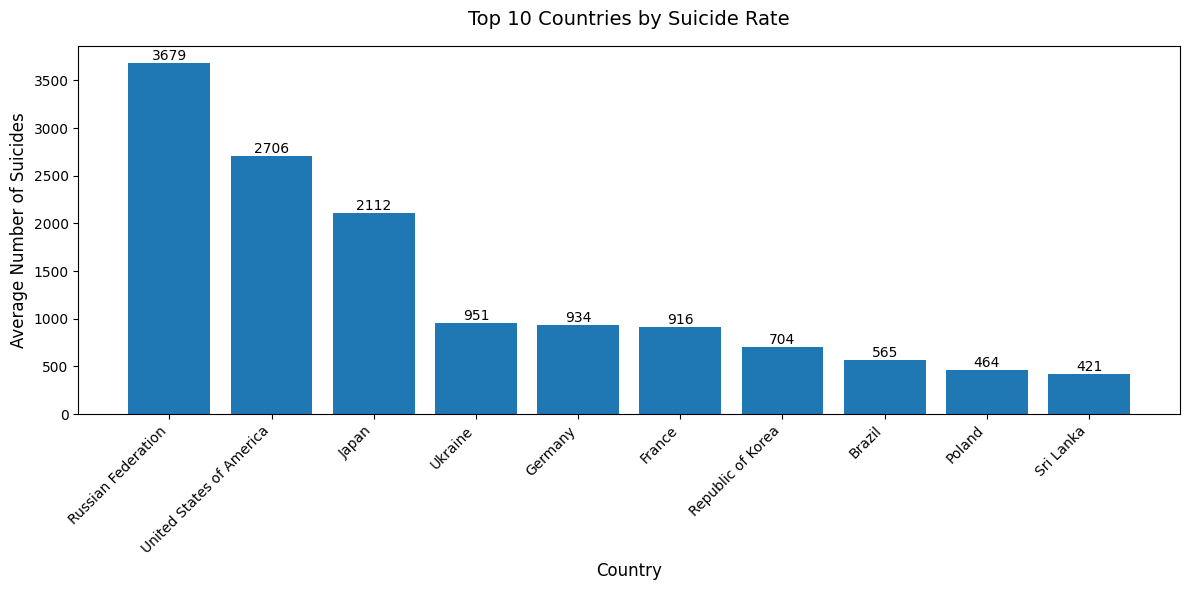

In [30]:
# Calculate mean suicide rates by country
country_suicide_rates = suicide_dataset.groupby('country')['suicides_no'].mean()

# Sort countries by suicide rate and get top 10
top_10_countries = country_suicide_rates.sort_values(ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_countries.index, top_10_countries.values)

# Customize the plot
plt.title('Top 10 Countries by Suicide Rate', fontsize=14, pad=15)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Number of Suicides', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}',
             ha='center', va='bottom')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()



10. Make a Pie chart on gender distribution of suicides for a specific year.

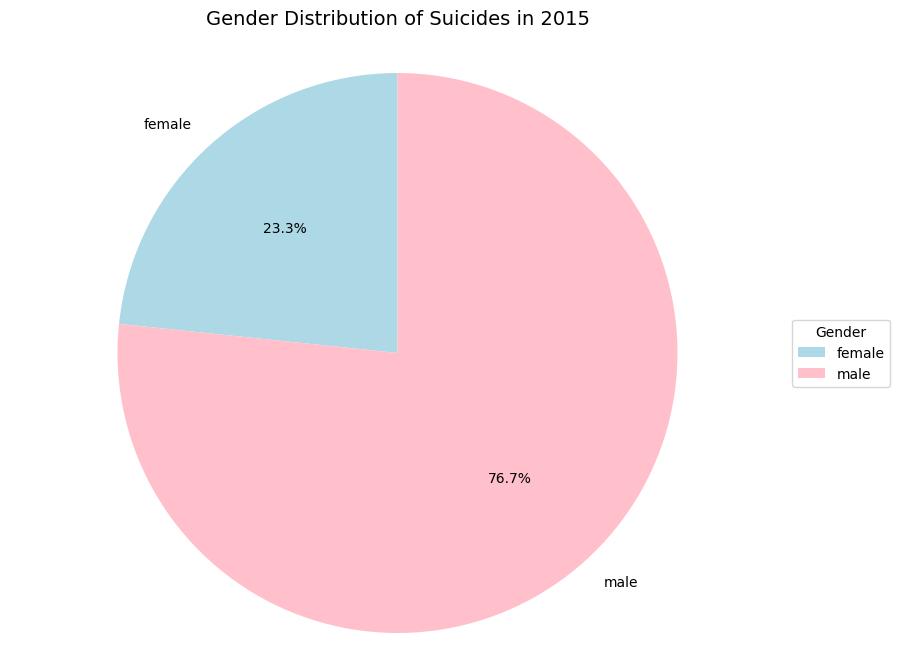

In [34]:
# Select a specific year (e.g., 2015) and calculate gender distribution
year = 2015
gender_distribution = suicide_dataset[suicide_dataset['year'] == year].groupby('sex')['suicides_no'].sum()

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(gender_distribution.values, labels=gender_distribution.index, autopct='%1.1f%%',
        colors=['lightblue', 'pink'], startangle=90)

# Add title
plt.title(f'Gender Distribution of Suicides in {year}', fontsize=14, pad=15)

# Add legend
plt.legend(gender_distribution.index, title='Gender', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


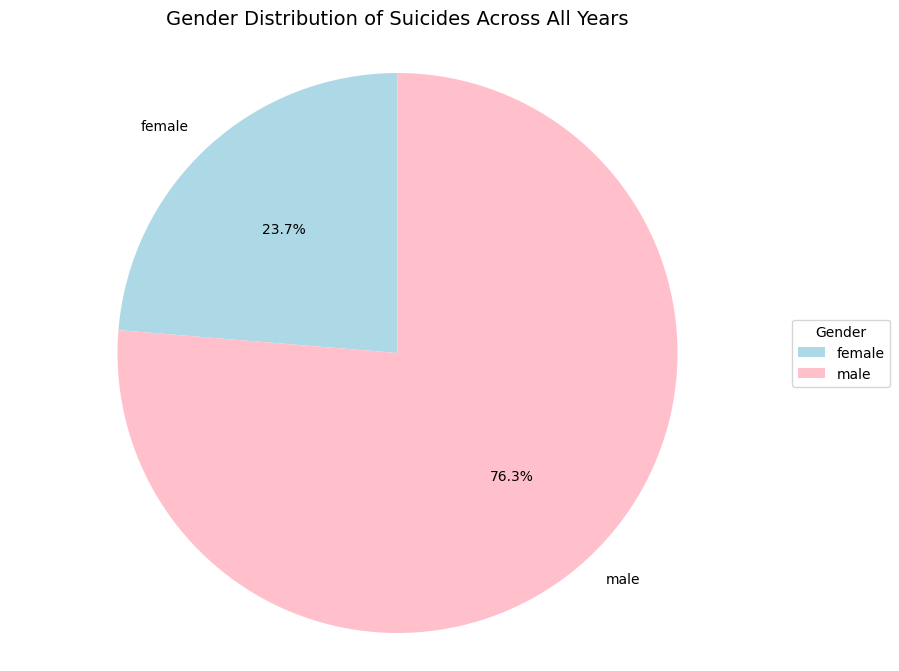

In [35]:
# Calculate gender distribution for all years
gender_distribution = suicide_dataset.groupby('sex')['suicides_no'].sum()

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(gender_distribution.values, labels=gender_distribution.index, autopct='%1.1f%%',
        colors=['lightblue', 'pink'], startangle=90)

# Add title
plt.title('Gender Distribution of Suicides Across All Years', fontsize=14, pad=15)

# Add legend
plt.legend(gender_distribution.index, title='Gender', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


### Dataset = "Goggle Play Store Apps" 

In [39]:
playstore_dataset = pd.read_csv('Datasets/Goggle_PlayStore_Apps.csv')
playstore_dataset.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Numpy Tasks

11. Filter apps with rating >= 4.5 and count them using NumPy. 

In [40]:
# Convert Rating column to numpy array and filter ratings >= 4.5
ratings_array = np.array(playstore_dataset['Rating'])
high_rated_apps = ratings_array[ratings_array >= 4.5]

# Count the number of apps with rating >= 4.5
count_high_rated = len(high_rated_apps)

print(f"Number of apps with rating >= 4.5: {count_high_rated}")


Number of apps with rating >= 4.5: 2956


12. Use NumPy to find the average number of installs for free apps only.

In [42]:
# Convert Installs column to numeric values by removing '+' and ',' characters
# First filter out non-numeric values and handle the conversion safely
installs = playstore_dataset['Installs'].str.replace('+', '').str.replace(',', '')
installs = pd.to_numeric(installs, errors='coerce')  # Convert to numeric, invalid values become NaN

# Create boolean mask for free apps
free_apps_mask = playstore_dataset['Type'] == 'Free'

# Calculate average installs for free apps using numpy, ignoring NaN values
avg_free_installs = np.nanmean(installs[free_apps_mask])

print(f"Average number of installs for free apps: {avg_free_installs:,.2f}")


Average number of installs for free apps: 16,690,953.02


## Matplotlib Tasks

13. Make a Histogram on distribution of apps ratings.

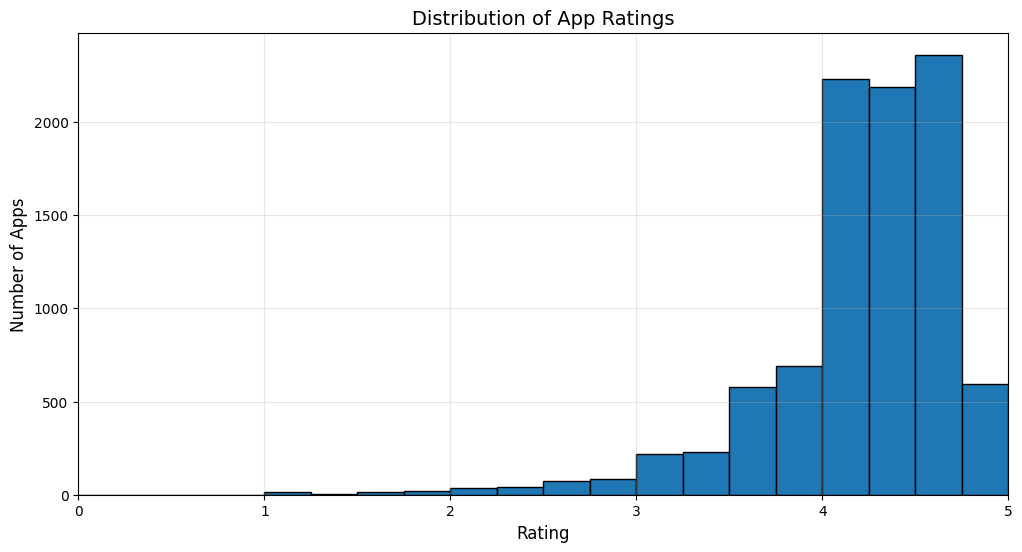

In [48]:
# Create a histogram of app ratings
plt.figure(figsize=(12, 6))
plt.hist(playstore_dataset['Rating'].dropna(), bins=20, edgecolor='black', range=(0, 5))
plt.title('Distribution of App Ratings', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(0, 5)  # Set x-axis limits to match rating range
plt.show()


14. Make a Pie Chart on Free vs Paid apps comparison.

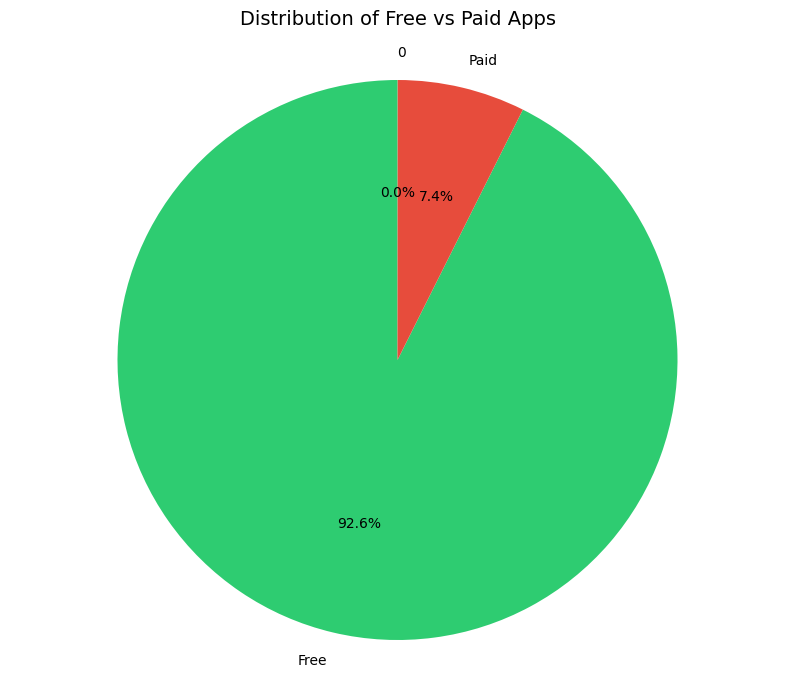

In [49]:
# Count the number of free and paid apps
app_types = playstore_dataset['Type'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(app_types, labels=app_types.index, autopct='%1.1f%%', 
        colors=['#2ecc71', '#e74c3c'], startangle=90)
plt.title('Distribution of Free vs Paid Apps', fontsize=14, pad=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


15. Bar chart: Number of apps in each category (e.g. GAME, EDUCATION, TOOLS). 

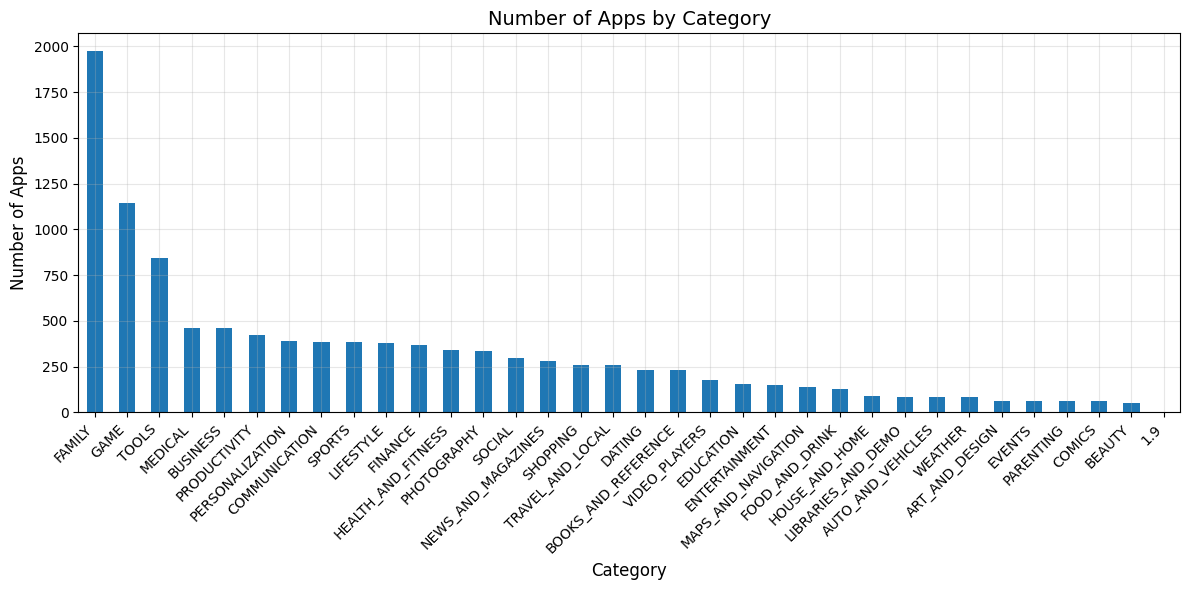

In [50]:
# Count the number of apps in each category
category_counts = playstore_dataset['Category'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.title('Number of Apps by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.grid(True, alpha=0.3)
plt.show()


<div style="text-align: center">

# **Meme Time**

### **Plot bana toh liya, lekin usko samajhne ke liye psychiatrist chahiye.**

</div>
